In [1]:
%%time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, auc

import warnings
warnings.filterwarnings('ignore')
import time

CPU times: total: 3.45 s
Wall time: 34 s


In [2]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
X = df.drop('target', axis=1)
y = df['target']

In [4]:
y.head() #target variable is in 0 and 1

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [5]:
y.value_counts()
# 0: malignant, 1: benign

target
1    357
0    212
Name: count, dtype: int64

In [6]:
y.isna().sum() # no missing values

np.int64(0)

In [7]:
#Splitting into training (70%) and test sets (30%).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# **Creating Class "Particle Swarm Optimization"**

In [8]:
class apply_PSO:
    def __init__(self, X_train,y_train,lambda_term = 0.01, penalty = 'no',n_iterations = 100, n_particles = 30, w = 0.7, c1 = 1.5, c2 = 1.5):
        # Initialize parameters
        self.X_train = X_train                                                                      #Feature matrix
        self.y_train = y_train                                                                      #Target variable     
        self.X_test = X_test                                                                        #Test feature matrix
        self.y_test = y_test                                                                        #Test target variable 
        #Hyperparameters
        self.lambda_term = lambda_term                                                              #Regularization parameter
        self.penalty = penalty                                                                      #Regularization type (l1, l2, or no)
        self.n_iterations = n_iterations                                                            #Number of iterations for PSO
        self.n_particles = n_particles                                                              #Number of particles in the swarm
        self.w = w                                                                                  #Inertia weight
        self.c1 = c1                                                                                #Cognitive coefficient  
        self.c2 = c2                                                                                #Social coefficient
        # Initialize particles
        self.dim = X_train.shape[1]                                                                 #Number of features
        self.positions = np.random.uniform(-1, 1, (self.n_particles, self.dim))                     #Initial positions of particles
        self.velocities = np.random.uniform(0.1, 1, (self.n_particles, self.dim))                   #Initial velocities of particles
        self.personal_best_positions = self.positions.copy()                                        #Personal best positions of particles
        self.personal_best_scores = np.array([self.log_loss_reg(pos) for pos in self.positions])    #Personal best scores of particles
        self.global_best_index = np.argmin(self.personal_best_scores)                               #Index of the global best particle
        self.global_best_position = self.positions[self.global_best_index].copy()                   #Global best position 
        self.global_best_score = self.personal_best_scores[self.global_best_index]                  #Global best score
        
        self.training_loss = []                                                                     #List to store training loss for plotting
    
    def log_loss_reg(self, beta):                                                                   #Logistic loss function with regularization
        z = np.dot(self.X_train, beta)
        p = 1 / (1 + np.exp(-z))
        epsilon = 1e-15  # To avoid log(0)
        #p = np.clip(p, epsilon, 1 - epsilon)  # Clip p to avoid log(0)
        loss = -np.mean(self.y_train * np.log(p + epsilon) + (1 - self.y_train) * np.log(1 - p + epsilon))
        if self.penalty.lower == 'l1':
            reg = self.lambda_term * np.sum(np.abs(beta))
        elif self.penalty.lower == 'l2':
            reg = self.lambda_term * np.sum(beta ** 2)
        else:
            reg = 0
        return (loss + reg)
    
    def optimize(self):                                                                             #Optimization function using PSO
        for iter in range(self.n_iterations):
            for particle in range(self.n_particles):
                #Update Velocity
                r1 = np.random.rand(self.dim)
                r2 = np.random.rand(self.dim)
                self.velocities[particle] = (self.w * self.velocities[particle]) + self.c1 * r1 * (self.personal_best_positions[particle] - self.positions[particle]) + self.c2 * r2 * (self.global_best_position - self.positions[particle])
                #Update Position
                self.positions[particle] += self.velocities[particle]
                #Evaluate new position
                score = self.log_loss_reg(self.positions[particle])
                #Update Personal Best
                if score < self.personal_best_scores[particle]:
                    self.personal_best_scores[particle] = score
                    self.personal_best_positions[particle] = self.positions[particle].copy()
                #Update Global Best
                if score < self.global_best_score:
                    self.global_best_score = score
                    self.global_best_position = self.positions[particle].copy()
                
            # Store training loss for plotting
            self.training_loss.append(self.global_best_score)
        # Final best position
        plt.figure(figsize=(6,4))
        plt.plot(self.training_loss, label='Training Loss')
        plt.title(f'Training Loss Over Iterations for {self.penalty} penalty')
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid()
        plt.show()

        # # Output results
        print("\nOptimization complete.")
        print(f"Best Beta Coefficients: \n{self.global_best_position}")
        print(f"\nBest Loss: {self.global_best_score}")
    
    def predict(self, X_test):
        z = np.dot(X_test, self.global_best_position)
        p = 1 / (1 + np.exp(-z))
        y_pred =  (p > 0.5).astype(int)
        return y_pred
    
    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred)
        
        print(f"\nEvaluation Metrics with respect to {self.penalty} penalty:\n")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"F1 Score: {f1:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"ROC AUC: {roc_auc:.4f}\n\n")


**PSO with No penalty**

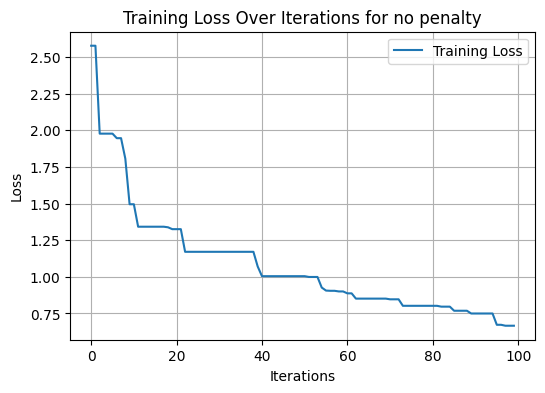


Optimization complete.
Best Beta Coefficients: 
[-1.40285173 -0.00443722  0.50403799  0.12014771  0.09331721  0.60389044
  0.77647582 -0.32108088  1.28938057  1.05599637  2.17155517  0.31226437
 -1.08193233 -0.10490649  0.78952771  0.96933085  0.39695487  1.79508722
 -1.2369958  -2.13726537  1.40317924 -0.80664757  0.77547434 -0.22523851
 -0.43909242 -0.51973128 -0.98191114 -0.56931845 -1.72568304  0.38931681]

Best Loss: 0.6663237341282402

Evaluation Metrics with respect to no penalty:

Accuracy: 0.9532
F1 Score: 0.9626
Precision: 0.9717
Recall: 0.9537
ROC AUC: 0.9530


CPU times: total: 1.41 s
Wall time: 1.96 s


In [9]:
%%time
#No penalty
pso_lr = apply_PSO(X_train, y_train, lambda_term=0.01, penalty = 'no',n_iterations=100, n_particles=30)
pso_lr.optimize()
pso_lr.predict(X_test)
pso_lr.evaluate(X_test, y_test)

**PSO with Penalty**

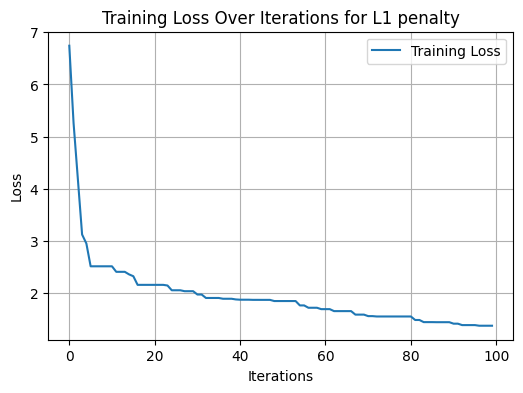


Optimization complete.
Best Beta Coefficients: 
[  0.6924332    0.48792906  -1.31895654   0.30948024   0.03801567
   1.61308792  -0.59694657  -1.91533515  -0.65973683  -0.43190127
  -0.4923959    1.5518423    5.09351505  -0.83697672  -0.85771594
   0.34010387  -2.08244065   0.0770115    4.90689667   1.38582897
   2.11707956  -2.53363268   3.21901809  -0.47611783   1.8660372
  -1.54975149   3.06543092   0.9940136  -17.73482372  -5.60781887]

Best Loss: 1.3659049772052656

Evaluation Metrics with respect to L1 penalty:

Accuracy: 0.9357
F1 Score: 0.9488
Precision: 0.9533
Recall: 0.9444
ROC AUC: 0.9325


CPU times: total: 1.42 s
Wall time: 1.42 s


In [10]:
%%time
#L1 penalty
pso_lr = apply_PSO(X_train, y_train, lambda_term=0.01, penalty = 'L1',n_iterations=100, n_particles=30)
pso_lr.optimize()
pso_lr.predict(X_test)
pso_lr.evaluate(X_test, y_test)

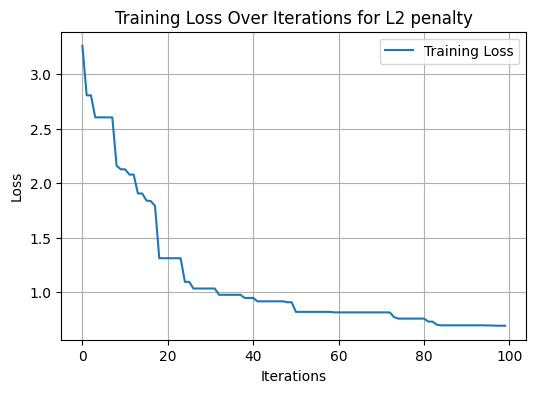


Optimization complete.
Best Beta Coefficients: 
[-0.38072808 -0.39073995  0.78336226  0.12893925 -3.93867338  1.40988276
  0.74996639  1.73955763 -1.22679338  1.23869798  1.24938253  1.23422764
  2.38058849 -0.52612519 -2.15317593  0.82481786  0.32788228  0.01332232
  0.74421983 -0.00738818  0.8458824  -0.55593519  0.1438302  -0.18209386
  0.39706771 -0.26070847 -0.27724025  0.91329768  2.19574809 -0.8650483 ]

Best Loss: 0.6939673834328275

Evaluation Metrics with respect to L2 penalty:

Accuracy: 0.9415
F1 Score: 0.9528
Precision: 0.9712
Recall: 0.9352
ROC AUC: 0.9438


CPU times: total: 1.42 s
Wall time: 1.42 s


In [11]:
%%time
#L2 penalty
pso_lr = apply_PSO(X_train, y_train, lambda_term=0.01, penalty = 'L2',n_iterations=100, n_particles=30)
pso_lr.optimize()
pso_lr.predict(X_test)
pso_lr.evaluate(X_test, y_test)

**Hyperparameter Tuning**

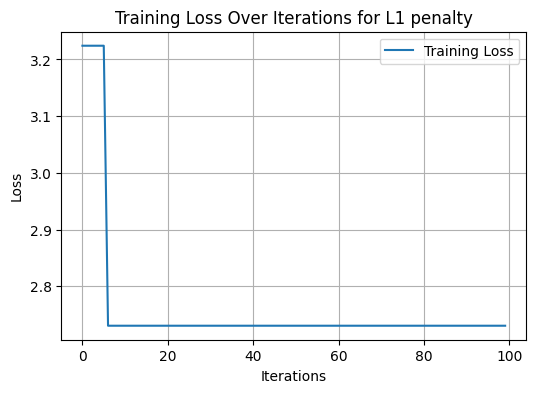


Optimization complete.
Best Beta Coefficients: 
[ 1.94103147  0.32972949  1.65342159  0.49966735  0.99046736 -0.54751984
  0.11500252  1.79035688  2.56433992  1.69446892 -0.92254027  2.42052579
  0.94320398 -0.79036003  0.03383848  0.43865065  1.84816728  0.65742626
  1.99833602 -0.51825287  2.26119824  0.55800823 -1.07291646 -0.48596807
  0.68361429 -2.60797164  1.62394061 -0.20997668  1.24713963  0.69890683]

Best Loss: 2.7304254824670804

Evaluation Metrics with respect to L1 penalty:

Accuracy: 0.9357
F1 Score: 0.9515
Precision: 0.9076
Recall: 1.0000
ROC AUC: 0.9127


CPU times: total: 1.88 s
Wall time: 1.9 s


In [12]:
%%time
#L1 penalty
pso_lr = apply_PSO(X_train, y_train, lambda_term=0.01, penalty = 'L1',n_iterations=100, n_particles=40, w = 0.9, c1 = 1.5, c2 = 2.0)
pso_lr.optimize()
pso_lr.predict(X_test)
pso_lr.evaluate(X_test, y_test)

### **LOGISTIC REGRESSION**

In [13]:
logreg = LogisticRegression(penalty='l1', C=1/0.01, solver='liblinear', max_iter=1000)

In [14]:
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [15]:
print(logreg.coef_)

[[ 1.26867020e+00 -7.88832663e-02  1.55005498e-01 -1.21083060e-02
   0.00000000e+00  3.56737575e+01  0.00000000e+00 -1.61557178e+02
   3.27202451e+01  0.00000000e+00 -4.12453058e+00  2.13228288e+00
   3.40763015e-01 -2.20913580e-01  0.00000000e+00  0.00000000e+00
   5.00474820e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   2.55605940e-01 -4.85469624e-01  9.63808532e-02 -2.09510955e-02
   0.00000000e+00  1.74842202e+01 -2.45636440e+01 -3.25899815e+01
  -3.41127917e+01  0.00000000e+00]]


In [16]:
d = logreg.coef_

In [17]:
print(logreg.intercept_)

[9.72090638]


In [18]:
coeffs = pd.Series(logreg.coef_[0], index=data.feature_names)
coeffs['intercept'] = logreg.intercept_[0]

coeffs = coeffs.sort_values(ascending=False)

coeffs

concavity error             50.047482
mean compactness            35.673758
mean symmetry               32.720245
worst compactness           17.484220
intercept                    9.720906
texture error                2.132283
mean radius                  1.268670
perimeter error              0.340763
worst radius                 0.255606
mean perimeter               0.155005
worst perimeter              0.096381
smoothness error             0.000000
mean fractal dimension       0.000000
mean smoothness              0.000000
mean concavity               0.000000
worst fractal dimension      0.000000
fractal dimension error      0.000000
worst smoothness             0.000000
compactness error            0.000000
symmetry error               0.000000
concave points error         0.000000
mean area                   -0.012108
worst area                  -0.020951
mean texture                -0.078883
area error                  -0.220914
worst texture               -0.485470
radius error

**LOGISTIC REGRESSION WITH L2 PENALTY**

In [19]:
logreg2 = LogisticRegression(penalty='l2', C=1/0.01, solver='liblinear', max_iter=1000)

In [20]:
logreg2.fit(X_train, y_train)
y_pred = logreg2.predict(X_test)

In [21]:
s = logreg2.coef_

In [22]:
print(logreg2.coef_)

[[ 6.65646311e+00  2.67153897e-01 -6.12658857e-01 -2.86006143e-02
  -1.79056458e+00 -5.81997278e-01 -3.18006214e+00 -4.37176166e+00
  -1.80440562e+00  2.64133438e-01 -1.36554708e+00  3.93116805e+00
   5.18155464e-01 -2.02429714e-01 -2.76580060e-01  1.81462203e+00
   2.24164356e+00 -4.09204739e-01 -1.92593415e-01  3.47398552e-01
  -8.77214992e-01 -6.71570490e-01  1.37562030e-01 -5.69801107e-03
  -3.45021884e+00  5.98937408e-01 -5.63562966e+00 -6.80166360e+00
  -6.76546313e+00  6.60348114e-01]]


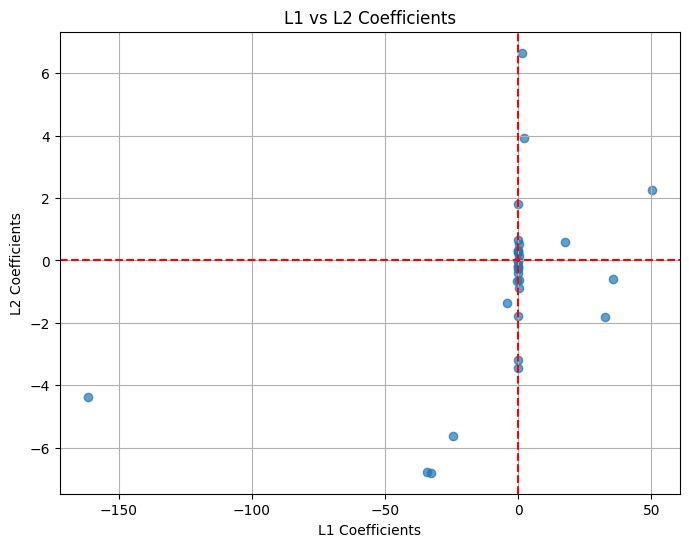

In [23]:
#plot d vs s
plt.figure(figsize=(8, 6))
plt.scatter(d, s, alpha=0.7)
plt.xlabel('L1 Coefficients')
plt.ylabel('L2 Coefficients')
plt.title('L1 vs L2 Coefficients')
plt.grid()
plt.axhline(0, color='red', linestyle='--')
plt.axvline(0, color='red', linestyle='--')
plt.show()

In [24]:
#count negative coefficients in d and s
d_neg = np.sum(d < 0)
s_neg = np.sum(s < 0)
print(f"Number of negative coefficients in L1: {d_neg}")
print(f"Number of negative coefficients in L2: {s_neg}")

Number of negative coefficients in L1: 10
Number of negative coefficients in L2: 19
